In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [215]:
pd.set_option('display.max_columns', None)

In [216]:
data = pd.read_csv("Airbnb_Open_Data.csv",skipinitialspace=True)

C:\Users\Azhar\AppData\Local\Temp\ipykernel_7300\3083123061.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Airbnb_Open_Data.csv",skipinitialspace=True)


In [217]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [218]:
data.columns = [col.lower().replace(" ","_") for col in data.columns]

In [219]:
data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [220]:
data['country'].value_counts(dropna=False)

United States    102067
NaN                 532
Name: country, dtype: int64

In [221]:
data['country_code'].value_counts(dropna=False)

US     102468
NaN       131
Name: country_code, dtype: int64

In [222]:
data['license'].value_counts(dropna=False)

NaN         102597
41662/AL         2
Name: license, dtype: int64

# Cleaning of data

DROPPING The non required columns for our analysis 

In [223]:
df1 = data.copy()

In [224]:
df1.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [225]:
df1['host_id'].nunique()

102057

In [226]:
df1.drop('host_id',inplace=True, axis = 1)

In [229]:
df1['construction_year'].value_counts(dropna=False).sort_index()

2003.0    5125
2004.0    5037
2005.0    5132
2006.0    5223
2007.0    5106
2008.0    5225
2009.0    5166
2010.0    5155
2011.0    5058
2012.0    5131
2013.0    5018
2014.0    5243
2015.0    5094
2016.0    5017
2017.0    5066
2018.0    5057
2019.0    5201
2020.0    5158
2021.0    5039
2022.0    5134
NaN        214
Name: construction_year, dtype: int64

In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_identity_verified          102310 non-null  object 
 3   host_name                       102193 non-null  object 
 4   neighbourhood_group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   country                         102067 non-null  object 
 9   country_code                    102468 non-null  object 
 10  instant_bookable                102494 non-null  object 
 11  cancellation_policy             102523 non-null  object 
 12  room_type       

In [232]:
df1.drop(columns = ["country_code", "country", "license"], axis = 1, inplace = True)

In [239]:
df1[(df1['last_review'].isna()) & (df1['number_of_reviews'] == 0)]

,id,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
20,1012382,Huge 2 BR Upper East Cental Park,verified,Audrey,Manhattan,East Harlem,40.79685,-73.94872,NaN,moderate,Entire home/apt,2013.0,$281,$56,7.0,0.0,NaN,NaN,3.0,2.0,347.0,"No smoking, No pets. No shoes in the house. V..."
27,1016248,Magnifique Suite au N de Manhattan - vue Cloitres,verified,Adrianna,Manhattan,Inwood,40.86754,-73.92639,NaN,strict,Private room,2017.0,$274,$55,4.0,0.0,NaN,NaN,NaN,1.0,96.0,To treat our home with respect. No smoking in...
37,1021771,Clean and Quiet in Brooklyn,verified,Arthur,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,False,moderate,Private room,2004.0,$203,$41,60.0,0.0,NaN,NaN,NaN,1.0,294.0,NO Shoes in the house. This is why my house is...
39,1022876,Country space in the city,verified,Deanna,Brooklyn,Flatbush,40.63702,-73.96327,True,strict,Private room,2011.0,"$1,020",$204,1.0,0.0,NaN,NaN,3.0,1.0,356.0,House Guidelines for our BnB We are delighted ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102590,6090228,Wonderful artists' loft in Brooklyn,unconfirmed,Daniel,Brooklyn,Crown Heights,40.66673,-73.96127,True,moderate,Entire home/apt,2003.0,$250,$50,1.0,0.0,NaN,NaN,1.0,1.0,276.0,#NAME?
102592,6091333,3BR/1 Ba in TriBeCa w/ outdoor deck,unconfirmed,Nick,Manhattan,Tribeca,40.71845,-74.01183,False,moderate,Entire home/apt,2016.0,$787,$157,1.0,0.0,NaN,NaN,2.0,1.0,177.0,Guests should treat my home as if it were thei...
102594,6092437,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102596,6093542,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN


In [241]:
df1.describe()

,id,lat,long,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [237]:
df = df1.copy()

In [238]:
df.isna().sum()

id                                    0
name                                250
host_identity_verified              289
host_name                           406
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room_type                             0
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
last_review                       15893
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
house_rules                       52131
dtype: int64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_identity_verified          102310 non-null  object 
 3   host_name                       102193 non-null  object 
 4   neighbourhood_group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room_type                       102599 non-null  object 
 11  construction_year               102385 non-null  float64
 12  price           

### Observation about data set so far
* The consturction year the data type of this column is float64
 but actually it should be a date-time object. If I want to convert this feature to a 
 date-time object, then first I have to modity the data (e.g., 2020.0) to this type 
 2020-01-01. Otherwise can't get the right result.Even if converted to int or float we will have NAN values in this object type dtype so leaving this column as it is.
* The house rules column has the maximum number of missing values since we wont be doing much with that couln keeping it as it is 
* The price column and service  fee column is shown as onject column will be removing the "$" sigh and converting it into int
* The last review is also shown as dtype object we will convert it into Date time object to get the date month year information from the dataset


In [242]:
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$", "").replace(",", "").replace(" ", ""))

In [243]:
df["price"] = df["price"].apply(lambda x: remove_dollar_sign(x))
df["service_fee"] = df["service_fee"].apply(lambda x: remove_dollar_sign(x))

In [250]:
# Converting from float to replace Nan to 0
df["minimum_nights"] = np.array(df["minimum_nights"], dtype = np.int16)
df["number_of_reviews"] = np.array(df["number_of_reviews"], dtype = np.int16)
df["calculated_host_listings_count"] = np.array(df["calculated_host_listings_count"], dtype = np.int16)

In [251]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [252]:
df["review_rate_number"].value_counts()

5    23369
4    23329
3    23265
2    23098
1     9212
0      326
Name: review_rate_number, dtype: int64

In [253]:
df["review_rate_number"] = np.array(df["review_rate_number"], dtype=np.int8)

In [254]:
df.drop(columns = ["house_rules"], axis = 1, inplace = True)

In [270]:
def plot_bar_chart(column_name: str, hue: str=None, top_values: int = None, palette: str = "flare", show_grid : bool = True, 
                   figsize: tuple = (16, 9), bar_font_size: int=14, bar_angle: int=45, angle: int=45):
    fig = plt.figure(figsize = figsize)
    ax = plt.subplot(1, 1, 1)
    
    counts = None
    
    if top_values is not None:
        counts = df[column_name].value_counts().iloc[:top_values]
    else:
        counts = df[column_name].value_counts()
        
    bar_ax = sns.barplot(x = counts.keys(), y = counts, palette = palette, ax = ax, hue = df[hue] if hue is not None else None) 
    
    for i in bar_ax.containers:
        bar_ax.bar_label(i, rotation=bar_angle, fontsize = bar_font_size)
        
    plt.xticks(rotation = angle, fontsize = 14)
    plt.xlabel(f"{column_name}", fontweight="bold", fontsize = 18)
    plt.ylabel("count", fontweight="bold", fontsize = 18)
    plt.title(f"Top {top_values} {column_name}" if top_values is not None else f"{column_name}", fontsize = 27)
    if show_grid: plt.grid()
    plt.show()

<Figure size 864x504 with 0 Axes>

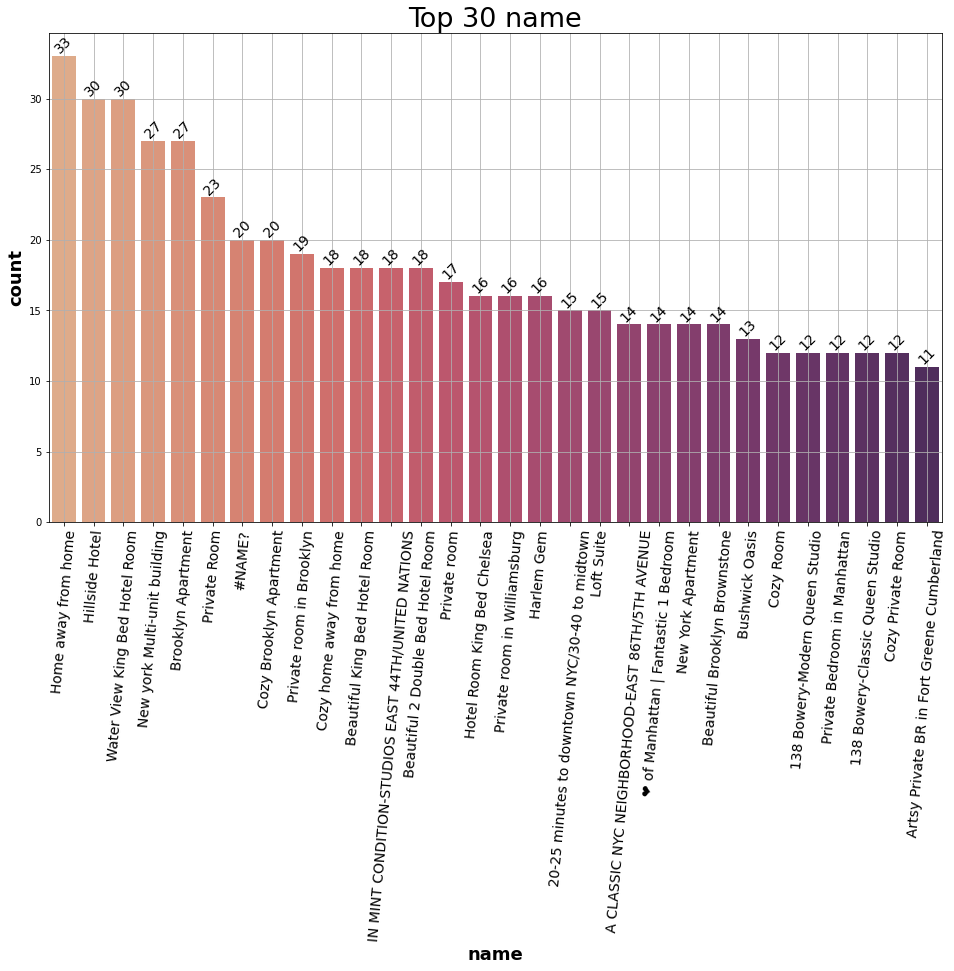

In [271]:
plt.figure(figsize=(12,7))
plot_bar_chart(column_name = "name", top_values = 30, palette = "flare", angle = 85)

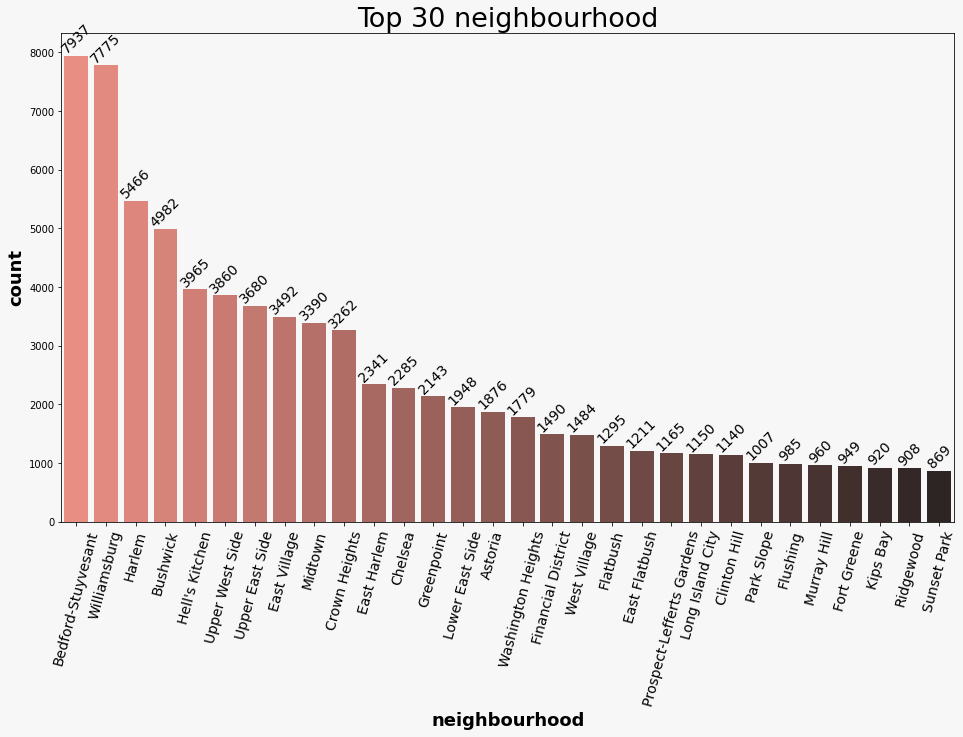

In [262]:
plot_bar_chart("neighbourhood", top_values = 30, palette = "dark:salmon_r", show_grid = False, angle = 75)

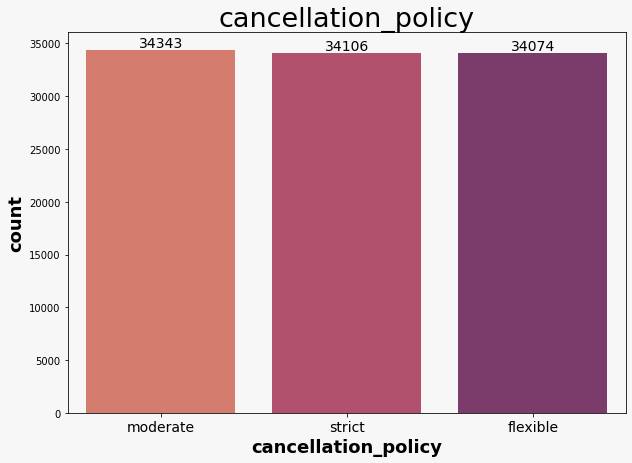

In [263]:
plot_bar_chart(column_name = "cancellation_policy", figsize = (10, 7), bar_angle = 0, angle = 0, show_grid = False)

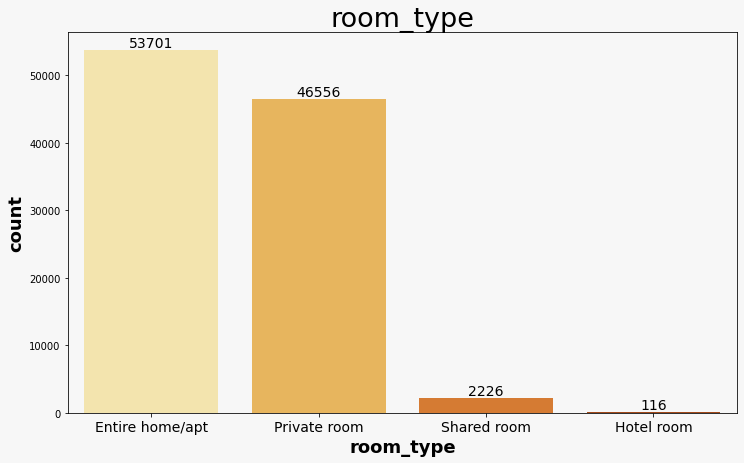

In [264]:
plot_bar_chart(column_name="room_type", palette="YlOrBr", show_grid=False, bar_angle=0, angle=0, figsize = (12, 7))

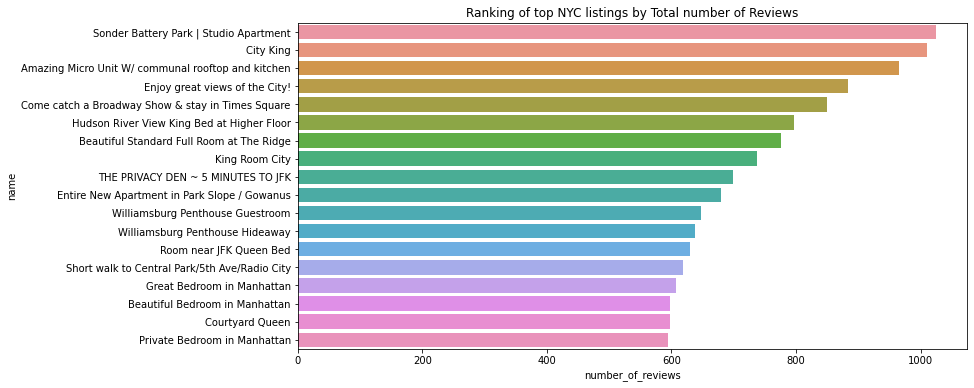

In [266]:
# Displaying only top 20 Ranking 
plt.figure(figsize=(12,6))
temp = df.sort_values(by="number_of_reviews", axis=0, ascending=False).iloc[:20, :]
sns.barplot(data=temp, y='name', x='number_of_reviews')
plt.title('Ranking of top NYC listings by Total number of Reviews')
plt.show()